# Load in training and test data

In [2]:
data_path = '../../data/processed/'

In [3]:
# Read in the Hannum dataset for training
hannum = pd.read_pickle(data_path + 'GSE40279_hannum/hannum32.pkl')
hannum_meta = pd.read_excel(data_path + 'GSE40279_hannum/hannum_pmeta.xlsx')

In [4]:
art = np.load(data_path + 'GSE42861_arthritis/arthritis32_full.npy', allow_pickle=True)
art_meta = pd.read_excel(data_path + 'GSE42861_arthritis/arthritis_pmeta.xlsx')
cgs=list_reader(data_path + 'GSE42861_arthritis/cgs_full.txt')
art = pd.DataFrame(art, columns=cgs)

In [5]:
# Read in the Lehne datasat for testing
lehne = np.load(data_path + 'GSE55763_lehne/lehne32_reduced.npy')
lehne_meta = pd.read_excel(data_path + 'GSE55763_lehne/lehne_pmeta.xlsx')
lehne_cgs = list_reader(data_path + 'GSE55763_lehne/cgs')
lehne = pd.DataFrame(lehne, columns=lehne_cgs)

### Read in the filtered (less SNPs and CpGs missing from GSE55763) age correlations 'filtered_age_corrs.xlsx' stored in 'cpg_sets' directory

In [6]:
age_corrs=pd.read_excel(data_path + 'cpg_sets/filtered_age_corrs.xlsx')

In [6]:
age_corrs=pd.read_excel(data_path + 'cpg_sets/hannum_age_corrs.xlsx')

In [26]:
overlap = list(set(lehne.columns) & set(hannum.columns) & set(age_corrs.CpG))

In [28]:
len(overlap)

470767

In [29]:
lehne = lehne[overlap]

In [30]:
hannum = hannum[overlap]

In [32]:
lehne

,cg17189494,cg07695272,cg02993722,cg03663955,cg01320780,cg14328683,cg09870801,cg16139934,cg12561748,cg14489884,...,cg17063731,cg26253974,cg01799115,cg15808604,cg14318001,cg01277511,cg12014333,cg17671280,cg02710553,cg25592977
0,0.363493,0.798924,0.886396,0.936021,0.086455,0.889249,0.865186,0.043622,0.046283,0.055950,...,0.543207,0.981165,0.892653,0.895533,0.933655,0.742683,0.141118,0.046551,0.874187,0.374352
1,0.326682,0.846610,0.886786,0.897488,0.067025,0.882374,0.847588,0.054582,0.053531,0.032841,...,0.538326,0.985192,0.928582,0.875150,0.904855,0.742767,0.113414,0.056844,0.898584,0.414659
2,0.372497,0.834615,0.878315,0.887970,0.089287,0.883974,0.859116,0.041290,0.046970,0.037989,...,0.535967,0.988846,0.908272,0.864715,0.978593,0.720086,0.163508,0.076349,0.899177,0.367785
3,0.353451,0.801795,0.882183,0.917837,0.065145,0.861507,0.837327,0.037494,0.038875,0.049377,...,0.553160,0.980285,0.891665,0.880238,0.931911,0.724743,0.117965,0.048114,0.885006,0.294231
4,0.366754,0.840994,0.888668,0.928582,0.041234,0.907796,0.857022,0.042058,0.050701,0.048852,...,0.529846,0.979049,0.894111,0.901267,0.869840,0.750156,0.144286,0.073443,0.842177,0.344844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626,0.325718,0.839193,0.899523,0.914944,0.067011,0.862036,0.865676,0.040148,0.039303,0.040762,...,0.537992,0.976376,0.909734,0.865927,0.929152,0.784882,0.135961,0.044041,0.915316,0.363581
2627,0.297867,0.805974,0.869279,0.935115,0.046115,0.865922,0.863256,0.028706,0.040844,0.046696,...,0.526161,0.986634,0.905747,0.852663,0.974733,0.765739,0.128342,0.057346,0.894328,0.386365
2628,0.325306,0.844503,0.887205,0.908492,0.039015,0.881766,0.862902,0.033090,0.048946,0.040264,...,0.528081,0.989006,0.937547,0.860145,0.924333,0.769713,0.130216,0.069127,0.894391,0.377248
2629,0.323304,0.781598,0.898101,0.869032,0.049817,0.863703,0.865101,0.030810,0.036370,0.036771,...,0.483042,0.981272,0.887319,0.856983,0.945750,0.781240,0.150485,0.061008,0.874625,0.327191


In [33]:
hannum

CpG,cg17189494,cg07695272,cg02993722,cg03663955,cg01320780,cg14328683,cg09870801,cg16139934,cg12561748,cg14489884,...,cg17063731,cg26253974,cg01799115,cg15808604,cg14318001,cg01277511,cg12014333,cg17671280,cg02710553,cg25592977
0,0.320786,0.838934,0.868919,0.922338,0.113271,0.898423,0.818656,0.040882,0.046002,0.043921,...,0.422917,0.980591,0.878606,0.891807,0.922487,0.736894,0.146910,0.065743,0.887234,0.359737
1,0.302168,0.832359,0.876075,0.928366,0.106735,0.905157,0.821835,0.044024,0.048600,0.039524,...,0.451360,0.991821,0.870791,0.893725,0.944585,0.744586,0.139761,0.068152,0.883851,0.432998
2,0.364716,0.817183,0.882648,0.884827,0.106954,0.900231,0.822702,0.049631,0.059174,0.043923,...,0.462107,0.975407,0.870619,0.908051,0.954032,0.740283,0.172904,0.052537,0.903397,0.357984
3,0.341895,0.808484,0.883310,0.902915,0.118431,0.910296,0.822008,0.037234,0.049293,0.036970,...,0.453578,0.974710,0.902659,0.861829,0.922228,0.718812,0.200401,0.065790,0.898741,0.403865
4,0.337370,0.831495,0.897846,0.915850,0.114201,0.912689,0.858712,0.037504,0.037011,0.046205,...,0.497322,0.984530,0.941228,0.885612,0.949356,0.725634,0.123929,0.069998,0.910934,0.381467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,0.428526,0.881832,0.903768,0.907260,0.077764,0.900129,0.868105,0.042305,0.050000,0.049341,...,0.513244,0.991555,0.972919,0.872935,0.980808,0.731857,0.141752,0.062636,0.891247,0.329729
652,0.321683,0.878241,0.934756,0.928257,0.067565,0.857512,0.911906,0.057769,0.062665,0.054257,...,0.473604,0.991213,0.967219,0.873145,0.938344,0.737733,0.087619,0.094268,0.849070,0.414239
653,0.356528,0.849801,0.919790,0.927634,0.054191,0.902761,0.879588,0.053123,0.040270,0.051944,...,0.514840,0.991300,0.868374,0.857533,0.975662,0.726559,0.083018,0.054468,0.890988,0.564717
654,0.383606,0.852026,0.916041,0.917989,0.057560,0.897896,0.861643,0.058290,0.054838,0.054681,...,0.531878,0.991414,0.924497,0.869480,0.930901,0.764402,0.098735,0.054660,0.902459,0.419848


In [31]:
art = art[overlap]

In [20]:
art

,cg17189494,cg07695272,cg02993722,cg03663955,cg01320780,cg14328683,cg09870801,cg16139934,cg12561748,cg14489884,...,cg17063731,cg26253974,cg01799115,cg15808604,cg14318001,cg01277511,cg00534492,cg17671280,cg02710553,cg25592977
0,0.301642,0.946597,0.962856,0.969029,0.083926,0.887930,0.906815,0.013261,0.011267,0.014050,...,0.511156,0.967029,0.947148,0.957186,0.967946,0.815183,0.272928,0.026370,0.956361,0.384900
1,0.308354,0.912230,0.976984,0.958115,0.074468,0.869519,0.914073,0.008683,0.010927,0.016635,...,0.488696,0.967244,0.936637,0.967392,0.973219,0.834837,0.218114,0.027751,0.969125,0.369795
2,0.340695,0.934099,0.960197,0.974984,0.080723,0.848630,0.928668,0.011114,0.012528,0.010842,...,0.502531,0.969184,0.952310,0.963475,0.975672,0.804623,0.186662,0.025390,0.966095,0.393234
3,0.305708,0.919638,0.979723,0.957245,0.059291,0.864408,0.955414,0.010892,0.012798,0.014395,...,0.529555,0.968556,0.947083,0.962155,0.966361,0.789698,0.160973,0.024102,0.959346,0.356330
4,0.322805,0.951827,0.978258,0.960816,0.072790,0.870665,0.931270,0.011866,0.012436,0.015360,...,0.487095,0.968706,0.946164,0.967374,0.973741,0.799331,0.179031,0.046305,0.953770,0.334065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,0.321887,0.967458,0.989828,0.958033,0.065982,0.926239,0.944715,0.014713,0.016942,0.015907,...,0.457833,0.965117,0.945908,0.973042,0.962952,0.813384,0.235609,0.057869,0.971630,0.363925
685,0.086085,0.816560,0.980738,0.721140,0.083778,0.978918,0.962282,0.022827,0.018568,0.054202,...,0.486029,0.882817,0.455966,0.808997,0.846503,0.817331,0.136052,0.164895,0.981679,0.212131
686,0.331744,0.959790,0.983723,0.970005,0.064949,0.884574,0.946696,0.020568,0.016185,0.014729,...,0.426143,0.969646,0.945642,0.971084,0.970243,0.830113,0.254165,0.040640,0.956045,0.364228
687,0.299044,0.898884,0.978903,0.958245,0.060343,0.929468,0.947779,0.015185,0.014050,0.014398,...,0.393599,0.964383,0.936518,0.958852,0.963205,0.762996,0.236701,0.033474,0.975742,0.302449


In [38]:
age_corrs.CpG

0         cg16867657
1         cg06639320
2         cg24724428
3         cg22454769
4         cg10501210
             ...    
473029    cg15399533
473030    cg03495084
473031    cg23342777
473032    cg20795372
473033    cg01403239
Name: CpG, Length: 473034, dtype: object

In [40]:
age_corrs = age_corrs[age_corrs.CpG.isin(overlap)]

In [41]:
#Identify arthritis-shifted CpGs
up_shift, down_shift = get_shifts(art, art_meta, age_corrs.CpG[:10000], 'Control')

#Combine
d_shift = pd.concat([up_shift,down_shift])
d_shift.reset_index(inplace=True, drop=True)

In [43]:
#Get correlation magnitudes, sort correlation magnitude (descending)
d_shift['Abs. correlation'] = abs(d_shift.Correlation)
d_shift.sort_values(by='Abs. correlation', ignore_index=True, inplace=True,ascending=False)
d_shift['Abs. d'] = abs(d_shift['Cohens d'])

# Generate Supplementary Table 3

In [44]:
d_shift

,CpG,Shift,Correlation,Cohens d,Sign,Order,Abs. correlation,Abs. d
0,cg16867657,-0.009140,0.847155,0.663105,-1,0,0.847155,0.663105
1,cg21572722,-0.013792,0.745844,1.246969,-1,7,0.745844,1.246969
2,cg22454769,0.009697,0.730099,-0.629524,1,3,0.730099,0.629524
3,cg06639320,-0.007488,0.720896,0.569131,-1,1,0.720896,0.569131
4,cg08097417,-0.007874,0.708310,0.739369,-1,27,0.708310,0.739369
...,...,...,...,...,...,...,...,...
9995,cg16456337,0.011331,0.000061,-1.068008,1,9692,0.000061,1.068008
9996,cg20709868,0.016851,-0.000055,-1.393279,1,9969,0.000055,1.393279
9997,cg16241861,0.011039,0.000055,-0.737081,1,7272,0.000055,0.737081
9998,cg01585758,-0.002377,0.000037,0.499104,-1,5509,0.000037,0.499104


In [45]:
hannum=hannum[d_shift.CpG]

In [46]:
lehne=lehne[d_shift.CpG]
art=art[d_shift.CpG]

In [83]:
# #get the transformed data for the training (Hannum), validation (Lehne), and test (arthritis) sets
# hannum_transform = coherence_transform(hannum, d_shift)
# print('Done')
# lehne_transform = coherence_transform(lehne, d_shift)
# print('Done')
# art_transform = coherence_transform(art, d_shift)

In [134]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import pickle as pkl

%run ../../scripts/mfss_model_train.py
%run ../../scripts/coherence_analysis_and_transform.py
%run ../../scripts/utils/data_processing.py
%matplotlib inline

In [135]:
model_cgs, best_iter, val_mse, val_r_val, test_mse, test_r_val = mfss_ols(d_shift.CpG.tolist(), hannum_transform, hannum_meta,
                                                                             lehne_transform, lehne_meta, 70,pos_weights=True)

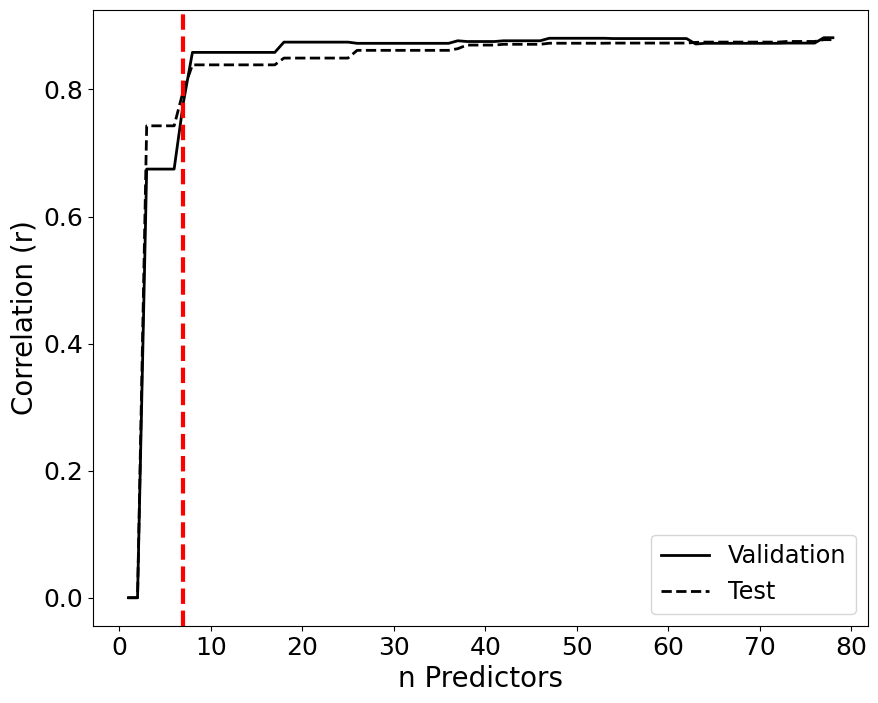

In [136]:
plt.figure(figsize=(10, 8)) 
x_lim = len(model_cgs)
plt.plot(np.linspace(1,x_lim,x_lim,dtype=int),val_r_val, c='k',linewidth=2, label='Validation' )
plt.plot(np.linspace(1,x_lim,x_lim,dtype=int),test_r_val, c='k',linewidth=2, linestyle='dashed', label='Test')
plt.axvline(x=best_iter, color='red', linestyle='--',linewidth=3)

plt.xlabel('n Predictors', fontsize=20)
plt.ylabel('Correlation (r)',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best', fontsize='xx-large')

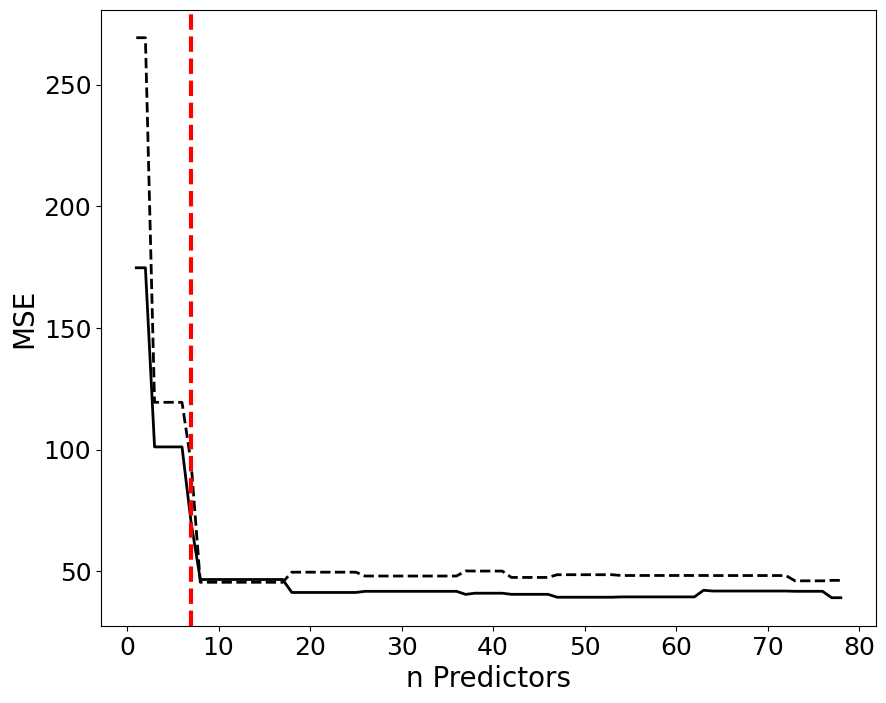

In [137]:
plt.figure(figsize=(10, 8)) 
x_lim = len(model_cgs)
plt.plot(np.linspace(1,x_lim,x_lim,dtype=int),val_mse, c='k',linewidth=2, label='Validation' )
plt.plot(np.linspace(1,x_lim,x_lim,dtype=int),test_mse, c='k',linewidth=2, linestyle='dashed', label='Test')
plt.axvline(x=best_iter, color='red', linestyle='--',linewidth=3)

plt.xlabel('n Predictors', fontsize=20);
plt.ylabel('MSE',fontsize=20);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

In [58]:
best_iter

227

In [20]:
#Re-sort by disease shift magnitude
d_shift['Abs. shift'] = abs(d_shift.Shift)
d_shift.sort_values(by="Abs. shift", inplace=True,ignore_index=True,ascending=False)

In [29]:
model_cgs, best_iter, val_mse, val_r_val, test_mse, test_r_val = mfss_ols(d_shift.CpG.tolist(), hannum_transform, hannum_meta,
                                                                             lehne_transform, lehne_meta, 800,pos_weights=True)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
It

Iteration: 558
Iteration: 559
Iteration: 560
Iteration: 561
Iteration: 562
Iteration: 563
Iteration: 564
Iteration: 565
Iteration: 566
Iteration: 567
Iteration: 568
Iteration: 569
Iteration: 570
Iteration: 571
Iteration: 572
Iteration: 573
Iteration: 574
Iteration: 575
Iteration: 576
Iteration: 577
Iteration: 578
Iteration: 579
Iteration: 580
Iteration: 581
Iteration: 582
Iteration: 583
Iteration: 584
Iteration: 585
Iteration: 586
Iteration: 587
Iteration: 588
Iteration: 589
Iteration: 590
Iteration: 591
Iteration: 592
Iteration: 593
Iteration: 594
Iteration: 595
Iteration: 596
Iteration: 597
Iteration: 598
Iteration: 599
Iteration: 600
Iteration: 601
Iteration: 602
Iteration: 603
Iteration: 604
Iteration: 605
Iteration: 606
Iteration: 607
Iteration: 608
Iteration: 609
Iteration: 610
Iteration: 611
Iteration: 612
Iteration: 613
Iteration: 614
Iteration: 615
Iteration: 616
Iteration: 617
Iteration: 618
Iteration: 619
Iteration: 620
Iteration: 621
Iteration: 622
Iteration: 623
Iteration:

Iteration: 1099
Iteration: 1100
Iteration: 1101
Iteration: 1102
Iteration: 1103
Iteration: 1104
Iteration: 1105
Iteration: 1106
Iteration: 1107
Iteration: 1108
Iteration: 1109
Iteration: 1110
Iteration: 1111
Iteration: 1112
Iteration: 1113
Iteration: 1114
Iteration: 1115
Iteration: 1116
Iteration: 1117
Iteration: 1118
Iteration: 1119
Iteration: 1120
Iteration: 1121
Iteration: 1122
Iteration: 1123
Iteration: 1124
Iteration: 1125
Iteration: 1126
Iteration: 1127
Iteration: 1128
Iteration: 1129
Iteration: 1130
Iteration: 1131
Iteration: 1132
Iteration: 1133
Iteration: 1134
Iteration: 1135
Iteration: 1136
Iteration: 1137
Iteration: 1138
Iteration: 1139
Iteration: 1140
Iteration: 1141
Iteration: 1142
Iteration: 1143
Iteration: 1144
Iteration: 1145
Iteration: 1146
Iteration: 1147
Iteration: 1148
Iteration: 1149
Iteration: 1150
Iteration: 1151
Iteration: 1152
Iteration: 1153
Iteration: 1154
Iteration: 1155
Iteration: 1156
Iteration: 1157
Iteration: 1158
Iteration: 1159
Iteration: 1160
Iteratio

Iteration: 1612
Iteration: 1613
Iteration: 1614
Iteration: 1615
Iteration: 1616
Iteration: 1617
Iteration: 1618
Iteration: 1619
Iteration: 1620
Iteration: 1621
Iteration: 1622
Iteration: 1623
Iteration: 1624
Iteration: 1625
Iteration: 1626
Iteration: 1627
Iteration: 1628
Iteration: 1629
Iteration: 1630
Iteration: 1631
Iteration: 1632
Iteration: 1633
Iteration: 1634
Iteration: 1635
Iteration: 1636
Iteration: 1637
Iteration: 1638
Iteration: 1639
Iteration: 1640
Iteration: 1641
Iteration: 1642
Iteration: 1643
Iteration: 1644
Iteration: 1645
Iteration: 1646
Iteration: 1647
Iteration: 1648
Iteration: 1649
Iteration: 1650
Iteration: 1651
Iteration: 1652
Iteration: 1653
Iteration: 1654
Iteration: 1655
Iteration: 1656
Iteration: 1657
Iteration: 1658
Iteration: 1659
Iteration: 1660
Iteration: 1661
Iteration: 1662
Iteration: 1663
Iteration: 1664
Iteration: 1665
Iteration: 1666
Iteration: 1667
Iteration: 1668
Iteration: 1669
Iteration: 1670
Iteration: 1671
Iteration: 1672
Iteration: 1673
Iteratio

Iteration: 2125
Iteration: 2126
Iteration: 2127
Iteration: 2128
Iteration: 2129
Iteration: 2130
Iteration: 2131
Iteration: 2132
Iteration: 2133
Iteration: 2134
Iteration: 2135
Iteration: 2136
Iteration: 2137
Iteration: 2138
Iteration: 2139
Iteration: 2140
Iteration: 2141
Iteration: 2142
Iteration: 2143
Iteration: 2144
Iteration: 2145
Iteration: 2146
Iteration: 2147
Iteration: 2148
Iteration: 2149
Iteration: 2150
Iteration: 2151
Iteration: 2152
Iteration: 2153
Iteration: 2154
Iteration: 2155
Iteration: 2156
Iteration: 2157
Iteration: 2158
Iteration: 2159
Iteration: 2160
Iteration: 2161
Iteration: 2162
Iteration: 2163
Iteration: 2164
Iteration: 2165
Iteration: 2166
Iteration: 2167
Iteration: 2168
Iteration: 2169
Iteration: 2170
Iteration: 2171
Iteration: 2172
Iteration: 2173
Iteration: 2174
Iteration: 2175
Iteration: 2176
Iteration: 2177
Iteration: 2178
Iteration: 2179
Iteration: 2180
Iteration: 2181
Iteration: 2182
Iteration: 2183
Iteration: 2184
Iteration: 2185
Iteration: 2186
Iteratio

# Generate Supplementary Figure 5a (top)

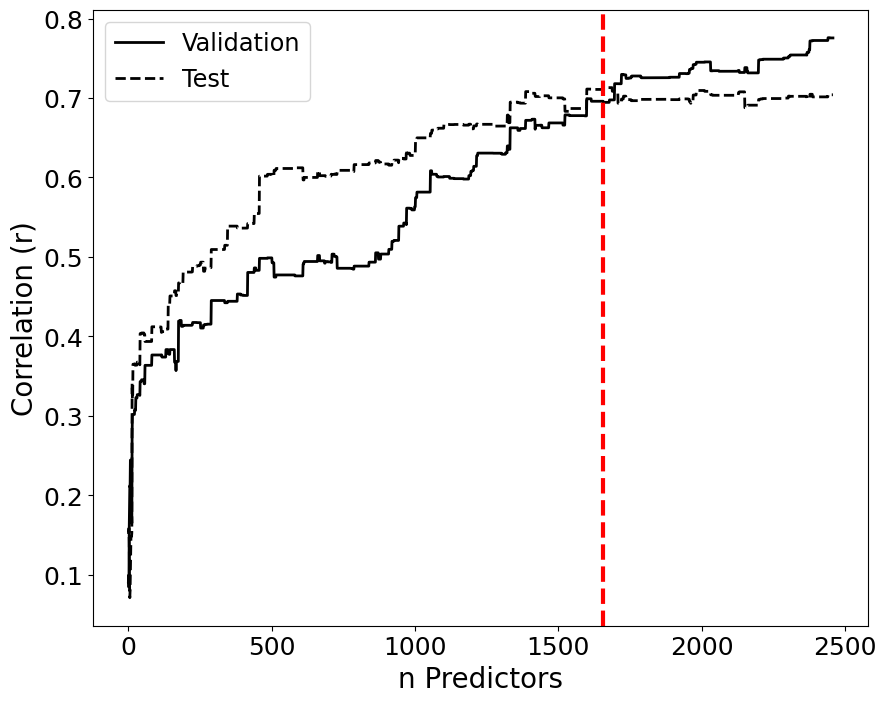

In [30]:
plt.figure(figsize=(10, 8)) 
x_lim = len(model_cgs)
plt.plot(np.linspace(1,x_lim,x_lim,dtype=int),val_r_val, c='k',linewidth=2, label='Validation' )
plt.plot(np.linspace(1,x_lim,x_lim,dtype=int),test_r_val, c='k',linewidth=2, linestyle='dashed', label='Test')
plt.axvline(x=best_iter, color='red', linestyle='--',linewidth=3)

plt.xlabel('n Predictors', fontsize=20)
plt.ylabel('Correlation (r)',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best', fontsize='xx-large')

# Generate Supplementary Figure 5a (bottom)

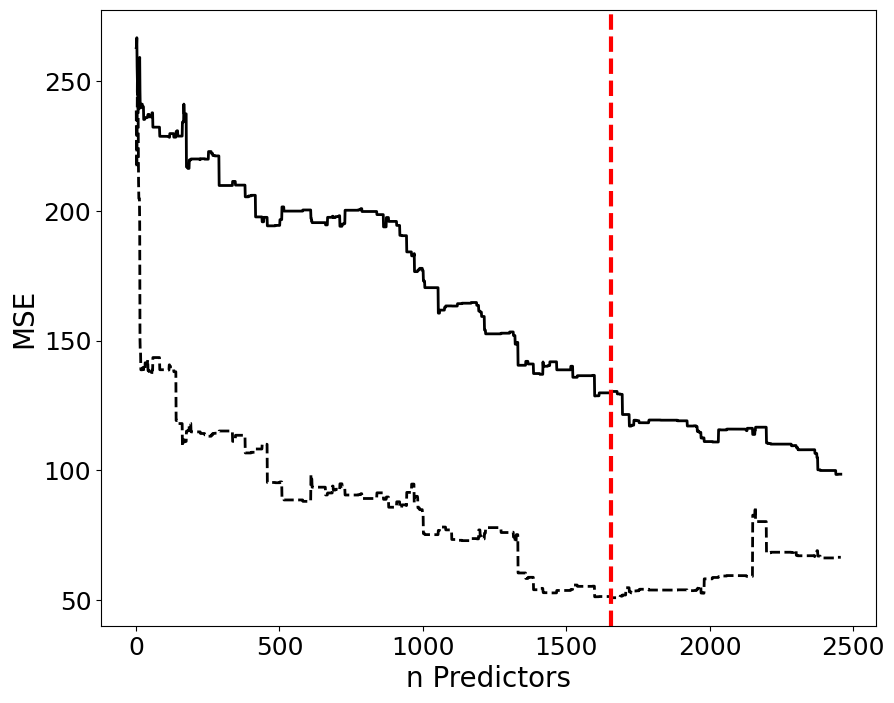

In [31]:
plt.figure(figsize=(10, 8)) 
x_lim = len(model_cgs)
plt.plot(np.linspace(1,x_lim,x_lim,dtype=int),val_mse, c='k',linewidth=2, label='Validation' )
plt.plot(np.linspace(1,x_lim,x_lim,dtype=int),test_mse, c='k',linewidth=2, linestyle='dashed', label='Test')
plt.axvline(x=best_iter, color='red', linestyle='--',linewidth=3)

plt.xlabel('n Predictors', fontsize=20);
plt.ylabel('MSE',fontsize=20);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

## Load and prep the V7 dataset

In [ ]:
h_comb = np.load('Datasets/Combined/V7_healthy.npy', allow_pickle=True)
d_comb = np.load('Datasets/Combined/V7_disease.npy', allow_pickle=True)
cgs=list_reader('Datasets/Combined/V7_cgs.txt')
h_comb = pd.DataFrame(h_comb, columns=cgs)
d_comb = pd.DataFrame(d_comb, columns=cgs)

v7_meta = pd.read_excel('Datasets/Combined/V7_pmeta.xlsx')
h_meta = v7_meta.copy()
d_meta = v7_meta.copy()
h_meta = h_meta[h_meta.healthy==0]
d_meta = d_meta[d_meta.healthy==1]
h_meta.reset_index(drop=True, inplace=True)
d_meta.reset_index(drop=True, inplace=True)

In [ ]:
#combine into one dataset
v7 = pd.concat([h_comb,d_comb],ignore_index=True)
v7_meta = pd.concat([h_meta,d_meta],ignore_index=True)